In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders import TargetEncoder

In [ ]:
train_df=pd.read_csv('prep_train.csv')
train_df.head()

,Unnamed: 0,id,brand,model,model_year,milage,fuel_type,accident,price,HP,Engine_displacement,gear,trans_type,cylinder_type,engine_type_train,trans_type_train
0,0,0,Ford,F-150 Lariat,2018,74349,Gasoline,None reported,11000,375.0,3.5,10.0,A/T,6,Gasoline Fuel,Manual
1,1,1,BMW,335 i,2007,80000,Gasoline,None reported,8250,300.0,3.0,6.0,M/T,6,Gasoline Fuel,Manual
2,2,2,Jaguar,XF Luxury,2009,91491,Gasoline,None reported,15000,300.0,4.2,6.0,A/T,8,Gasoline Fuel,Manual
3,3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,None reported,63500,335.0,3.0,0.0,Transmission w/Dual Shift Mode,6,Hybrid Electric,Transmission w/Dual Shift Mode
4,5,5,Acura,Integra LS,2003,124756,Gasoline,At least 1 accident or damage reported,4995,140.0,1.8,5.0,M/T,4,Gasoline Fuel,Manual


In [ ]:
train_df=train_df.reset_index(drop=True)

In [ ]:
train_df.dtypes

Unnamed: 0               int64
id                       int64
brand                   object
model                   object
model_year               int64
milage                   int64
fuel_type               object
accident                object
price                    int64
HP                     float64
Engine_displacement    float64
gear                   float64
trans_type              object
cylinder_type           object
engine_type_train       object
trans_type_train        object
dtype: object

In [ ]:
train_df=train_df.iloc[:, 1:]

In [ ]:
train_df.nunique()

id                     45396
brand                     49
model                   1651
model_year                23
milage                  2715
fuel_type                  7
accident                   2
price                   1125
HP                       303
Engine_displacement       51
gear                       9
trans_type                 8
cylinder_type              9
engine_type_train          8
trans_type_train           5
dtype: int64

In [ ]:
train_df['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported'],
      dtype=object)

In [ ]:
train_df['accident'].isna().sum()

0

In [ ]:
for i in train_df.columns:
    print(train_df[i].unique())

[    0     1     2 ... 54269 54270 54272]
['Ford' 'BMW' 'Jaguar' 'Acura' 'Audi' 'GMC' 'Chevrolet' 'Porsche'
 'Mercedes-Benz' 'Lexus' 'Lincoln' 'Dodge' 'Volkswagen' 'Land' 'RAM'
 'Subaru' 'Maserati' 'Hyundai' 'MINI' 'Jeep' 'Honda' 'Hummer' 'Mazda'
 'Nissan' 'Toyota' 'Genesis' 'Cadillac' 'Mitsubishi' 'Kia' 'Buick' 'Volvo'
 'INFINITI' 'Scion' 'Suzuki' 'Alfa' 'Lamborghini' 'Rolls-Royce' 'Bentley'
 'Chrysler' 'Ferrari' 'McLaren' 'Pontiac' 'Aston' 'Lotus' 'Saturn' 'Tesla'
 'Mercury' 'Maybach' 'FIAT']
['F-150 Lariat' '335 i' 'XF Luxury' ... 'Tucson SEL' 'Trailblazer LT'
 'Acadia SLE-1']
[2018 2007 2009 2022 2003 2014 2019 2016 2017 2013 2015 2021 2012 2020
 2006 2023 2011 2010 2004 2002 2005 2008 2024]
[74349 80000 91491 ... 62850 82984 28750]
['Gasoline' 'Hybrid' 'E85 Flex Fuel' 'Diesel' 'Plug In Hybrid'
 'not supported' ' ']
['None reported' 'At least 1 accident or damage reported']
[11000  8250 15000 ... 49273 30919 44775]
[375. 300. 335. 140. 333. 193. 200. 355. 248. 182. 386. 360. 310. 2

In [ ]:
train_df['model'].unique()

array(['F-150 Lariat', '335 i', 'XF Luxury', ..., 'Tucson SEL',
       'Trailblazer LT', 'Acadia SLE-1'], dtype=object)

<ipython-input-838-7bfe19cfcea2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Text(0, 0.5, 'Average Price')

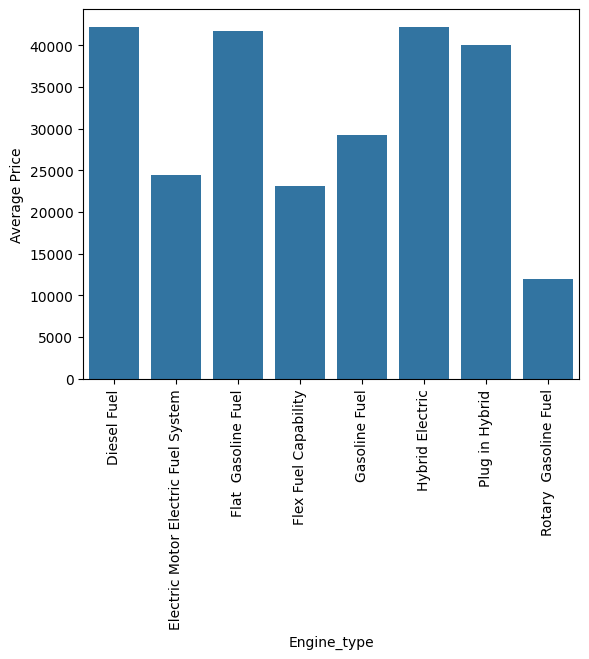

In [ ]:
avg_price_by_os_train =train_df.groupby('engine_type_train')['price'].mean()

# Plotting average price by operating system
fig, ax = plt.subplots()
ax = sns.barplot(x=avg_price_by_os_train.index, y=avg_price_by_os_train.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Engine_type')
ax.set_ylabel('Average Price')

In [ ]:
test_df=pd.read_csv('prep_test.csv')
test_df.head()

,Unnamed: 0,id,brand,model,model_year,milage,fuel_type,accident,HP,Engine_displacement,gear_test,cylinder_test,engine_type_test,trans_type_test
0,0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,None reported,302.0,3.5,0,6,Gasoline Fuel,Manual
1,1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,None reported,275.0,3.5,8,6,Gasoline Fuel,Manual
2,2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,None reported,241.0,2.0,7,4,Gasoline Fuel,Manual
3,3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,At least 1 accident or damage reported,518.0,5.0,0,8,Gasoline Fuel,Transmission w/Dual Shift Mode
4,4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,At least 1 accident or damage reported,335.0,3.0,8,6,Gasoline Fuel,Manual


In [ ]:
test_df=test_df.iloc[:, 1:]

In [ ]:
X_train=train_df
y=X_train.pop('price')
X_test=test_df

In [ ]:
encoder = TargetEncoder(cols = 'model')
encoder.fit(X_train['model'], y.to_frame()['price'])
X_train['model'] = encoder.transform(X_train['model'])
X_test['model'] = encoder.transform(X_test['model'])
X_train.head()

,id,brand,model,model_year,milage,fuel_type,accident,HP,Engine_displacement,gear,trans_type,cylinder_type,engine_type_train,trans_type_train
0,0,Ford,39066.452489,2018,74349,Gasoline,None reported,375.0,3.5,10.0,A/T,6,Gasoline Fuel,Manual
1,1,BMW,14992.035735,2007,80000,Gasoline,None reported,300.0,3.0,6.0,M/T,6,Gasoline Fuel,Manual
2,2,Jaguar,21854.575738,2009,91491,Gasoline,None reported,300.0,4.2,6.0,A/T,8,Gasoline Fuel,Manual
3,3,BMW,54680.095285,2022,2437,Hybrid,None reported,335.0,3.0,0.0,Transmission w/Dual Shift Mode,6,Hybrid Electric,Transmission w/Dual Shift Mode
4,5,Acura,26615.181566,2003,124756,Gasoline,At least 1 accident or damage reported,140.0,1.8,5.0,M/T,4,Gasoline Fuel,Manual


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45396 entries, 0 to 45395
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   45396 non-null  int64  
 1   brand                45396 non-null  object 
 2   model                45396 non-null  float64
 3   model_year           45396 non-null  int64  
 4   milage               45396 non-null  int64  
 5   fuel_type            45396 non-null  object 
 6   accident             45396 non-null  object 
 7   HP                   45396 non-null  float64
 8   Engine_displacement  45396 non-null  float64
 9   gear                 45396 non-null  float64
 10  trans_type           45396 non-null  object 
 11  cylinder_type        45396 non-null  object 
 12  engine_type_train    45396 non-null  object 
 13  trans_type_train     45396 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 4.8+ MB


In [ ]:
X_train.describe()

,id,model,model_year,milage,HP,Engine_displacement,gear
count,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000
mean,27106.658604,30381.672641,2014.973169,74857.849789,324.137809,3.669224,3.624703
std,15683.233835,11288.722187,4.938127,46062.681956,98.704945,1.315980,3.651111
min,0.000000,7931.591424,2002.000000,100.000000,76.000000,0.650000,0.000000
25%,13504.750000,22330.431153,2012.000000,39000.000000,252.000000,3.000000,0.000000
50%,27067.000000,28981.301324,2016.000000,70000.000000,308.000000,3.500000,5.000000
75%,40687.250000,37115.268677,2019.000000,104467.750000,390.000000,4.600000,7.000000
max,54272.000000,65062.397705,2024.000000,204000.000000,602.000000,6.800000,10.000000


In [ ]:
X_train.isna().sum()

id                     0
brand                  0
model                  0
model_year             0
milage                 0
fuel_type              0
accident               0
HP                     0
Engine_displacement    0
gear                   0
trans_type             0
cylinder_type          0
engine_type_train      0
trans_type_train       0
dtype: int64

In [ ]:
X_test.isna().sum()

id                       0
brand                    0
model                    0
model_year               0
milage                   0
fuel_type                0
accident                 0
HP                       0
Engine_displacement      0
gear_test                0
cylinder_test          236
engine_type_test       247
trans_type_test          7
dtype: int64

In [ ]:
X_train.drop('trans_type',axis=1,inplace=True)

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
cat_col_train=['accident','fuel_type']
# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(X_train[cat_col_train])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_col_train))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([X_train, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(cat_col_train, axis=1)
X_train_new=df_encoded
X_train_new.head()


,id,brand,model,model_year,milage,HP,Engine_displacement,gear,cylinder_type,engine_type_train,trans_type_train,accident_At least 1 accident or damage reported,accident_None reported,fuel_type_,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug In Hybrid,fuel_type_not supported
0,0,Ford,39066.452489,2018,74349,375.0,3.5,10.0,6,Gasoline Fuel,Manual,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,BMW,14992.035735,2007,80000,300.0,3.0,6.0,6,Gasoline Fuel,Manual,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,Jaguar,21854.575738,2009,91491,300.0,4.2,6.0,8,Gasoline Fuel,Manual,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,BMW,54680.095285,2022,2437,335.0,3.0,0.0,6,Hybrid Electric,Transmission w/Dual Shift Mode,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,Acura,26615.181566,2003,124756,140.0,1.8,5.0,4,Gasoline Fuel,Manual,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
X_test.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'accident',
       'HP', 'Engine_displacement', 'gear_test', 'cylinder_test',
       'engine_type_test', 'trans_type_test'],
      dtype='object')

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
cat_col_test=['accident','fuel_type']
# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(X_test[cat_col_test])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_col_test))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([X_test, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(cat_col_test, axis=1)
X_test_new=df_encoded
X_test_new.head()


,id,brand,model,model_year,milage,HP,Engine_displacement,gear_test,cylinder_test,engine_type_test,trans_type_test,accident_At least 1 accident or damage reported,accident_None reported,fuel_type_,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug In Hybrid,fuel_type_not supported
0,54273,Mercedes-Benz,23426.302632,2014,73000,302.0,3.5,0,6,Gasoline Fuel,Manual,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,54274,Lexus,19769.652953,2015,128032,275.0,3.5,8,6,Gasoline Fuel,Manual,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,54275,Mercedes-Benz,30480.426073,2015,51983,241.0,2.0,7,4,Gasoline Fuel,Manual,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,54276,Land,43619.185519,2018,29500,518.0,5.0,0,8,Gasoline Fuel,Transmission w/Dual Shift Mode,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,54277,BMW,46821.794869,2020,90000,335.0,3.0,8,6,Gasoline Fuel,Manual,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
X_train_new.dtypes

id                                                   int64
brand                                               object
model                                              float64
model_year                                           int64
milage                                               int64
HP                                                 float64
Engine_displacement                                float64
gear                                               float64
cylinder_type                                       object
engine_type_train                                   object
trans_type_train                                    object
accident_At least 1 accident or damage reported    float64
accident_None reported                             float64
fuel_type_                                         float64
fuel_type_Diesel                                   float64
fuel_type_E85 Flex Fuel                            float64
fuel_type_Gasoline                                 float

In [ ]:
X_test_new.dtypes

id                                                   int64
brand                                               object
model                                              float64
model_year                                           int64
milage                                               int64
HP                                                 float64
Engine_displacement                                float64
gear_test                                            int64
cylinder_test                                       object
engine_type_test                                    object
trans_type_test                                     object
accident_At least 1 accident or damage reported    float64
accident_None reported                             float64
fuel_type_                                         float64
fuel_type_Diesel                                   float64
fuel_type_E85 Flex Fuel                            float64
fuel_type_Gasoline                                 float

In [ ]:
cat_col=X_train_new.select_dtypes(include=object)
test_col=X_test_new.select_dtypes(include=object)

In [ ]:
for i in cat_col.columns:
    print(cat_col[i].unique())

['Ford' 'BMW' 'Jaguar' 'Acura' 'Audi' 'GMC' 'Chevrolet' 'Porsche'
 'Mercedes-Benz' 'Lexus' 'Lincoln' 'Dodge' 'Volkswagen' 'Land' 'RAM'
 'Subaru' 'Maserati' 'Hyundai' 'MINI' 'Jeep' 'Honda' 'Hummer' 'Mazda'
 'Nissan' 'Toyota' 'Genesis' 'Cadillac' 'Mitsubishi' 'Kia' 'Buick' 'Volvo'
 'INFINITI' 'Scion' 'Suzuki' 'Alfa' 'Lamborghini' 'Rolls-Royce' 'Bentley'
 'Chrysler' 'Ferrari' 'McLaren' 'Pontiac' 'Aston' 'Lotus' 'Saturn' 'Tesla'
 'Mercury' 'Maybach' 'FIAT']
['6' '8' '4' '12' '5' '10' 'Rotary engine Gasoline Fuel' '3'
 'Electric Motor Electric Fuel System']
['Gasoline Fuel' 'Hybrid Electric' 'Flex Fuel Capability' 'Diesel Fuel'
 'Flat  Gasoline Fuel' 'Plug in Hybrid' 'Rotary  Gasoline Fuel'
 'Electric Motor Electric Fuel System']
['Manual' 'Transmission w/Dual Shift Mode' 'Transmission Overdrive Switch'
 'Automatic' 'F']


In [ ]:
for i in test_col.columns:
    print(test_col[i].unique())

['Mercedes-Benz' 'Lexus' 'Land' 'BMW' 'Chevrolet' 'Dodge' 'Audi' 'Ford'
 'Kia' 'Toyota' 'Cadillac' 'GMC' 'Jeep' 'Mazda' 'Acura' 'INFINITI'
 'Volkswagen' 'Subaru' 'Hyundai' 'Jaguar' 'Porsche' 'Lincoln' 'Nissan'
 'RAM' 'Buick' 'Honda' 'MINI' 'Rolls-Royce' 'Genesis' 'Bentley' 'Volvo'
 'Saturn' 'Ferrari' 'Bugatti' 'Tesla' 'Pontiac' 'Hummer' 'Mitsubishi'
 'Maserati' 'Alfa' 'Scion' 'Lamborghini' 'Chrysler' 'McLaren' 'Lotus'
 'Rivian' 'Aston' 'FIAT' 'Lucid' 'Mercury' 'Suzuki' 'Saab' 'smart']
['6' '4' '8' nan '12' '10' '2' '5' '16'
 'Electric Motor Electric Fuel System' '3' 'Electric'
 'Rotary engine Gasoline Fuel' 'Electric Motor Hydrogen Fuel']
['Gasoline Fuel' 'Flex Fuel Capability' 'Diesel Fuel' 'Hybrid Electric'
 'GDI DOHC' 'PDI DOHC Twin Turbo' 'PDI DOHC' 'MPFI DOHC'
 'Flat  Gasoline Fuel' nan 'GDI DOHC Twin Turbo' 'GDI DOHC Turbo'
 'GDI OHV' 'MPFI DOHC Hybrid' 'Plug in Hybrid' '2. Liter Turbo'
 'Electric Motor Electric Fuel System' 'GDI SOHC' 'MPFI OHV'
 'DDI OHV Turbo Diesel' 'Electric

In [ ]:
for i,j in zip(X_test_new['cylinder_test'],X_test_new['engine_type_test']):
    if i==j:
        X_test_new.loc[X_test_new['cylinder_test']==i,'cylinder_test']='0'


In [ ]:
for i in test_col.columns:
    print(test_col[i].unique())

['Mercedes-Benz' 'Lexus' 'Land' 'BMW' 'Chevrolet' 'Dodge' 'Audi' 'Ford'
 'Kia' 'Toyota' 'Cadillac' 'GMC' 'Jeep' 'Mazda' 'Acura' 'INFINITI'
 'Volkswagen' 'Subaru' 'Hyundai' 'Jaguar' 'Porsche' 'Lincoln' 'Nissan'
 'RAM' 'Buick' 'Honda' 'MINI' 'Rolls-Royce' 'Genesis' 'Bentley' 'Volvo'
 'Saturn' 'Ferrari' 'Bugatti' 'Tesla' 'Pontiac' 'Hummer' 'Mitsubishi'
 'Maserati' 'Alfa' 'Scion' 'Lamborghini' 'Chrysler' 'McLaren' 'Lotus'
 'Rivian' 'Aston' 'FIAT' 'Lucid' 'Mercury' 'Suzuki' 'Saab' 'smart']
['6' '4' '8' nan '12' '10' '2' '5' '16'
 'Electric Motor Electric Fuel System' '3' 'Electric'
 'Rotary engine Gasoline Fuel' 'Electric Motor Hydrogen Fuel']
['Gasoline Fuel' 'Flex Fuel Capability' 'Diesel Fuel' 'Hybrid Electric'
 'GDI DOHC' 'PDI DOHC Twin Turbo' 'PDI DOHC' 'MPFI DOHC'
 'Flat  Gasoline Fuel' nan 'GDI DOHC Twin Turbo' 'GDI DOHC Turbo'
 'GDI OHV' 'MPFI DOHC Hybrid' 'Plug in Hybrid' '2. Liter Turbo'
 'Electric Motor Electric Fuel System' 'GDI SOHC' 'MPFI OHV'
 'DDI OHV Turbo Diesel' 'Electric

In [ ]:
X_test_new=X_test_new.rename(columns={'cylinder_test':'cylinder_type','engine_type_test': 'engine_type_train','trans_type_test':'trans_type_train'})
X_test_new.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'HP',
       'Engine_displacement', 'gear_test', 'cylinder_type',
       'engine_type_train', 'trans_type_train',
       'accident_At least 1 accident or damage reported',
       'accident_None reported', 'fuel_type_ ', 'fuel_type_Diesel',
       'fuel_type_E85 Flex Fuel', 'fuel_type_Gasoline', 'fuel_type_Hybrid',
       'fuel_type_Plug In Hybrid', 'fuel_type_not supported'],
      dtype='object')

In [ ]:
combined_data = pd.concat([X_train_new,X_test_new], ignore_index=True)
unique_brands = combined_data["brand"].unique()
print("Unique brands across both datasets:", unique_brands)


Unique brands across both datasets: ['Ford' 'BMW' 'Jaguar' 'Acura' 'Audi' 'GMC' 'Chevrolet' 'Porsche'
 'Mercedes-Benz' 'Lexus' 'Lincoln' 'Dodge' 'Volkswagen' 'Land' 'RAM'
 'Subaru' 'Maserati' 'Hyundai' 'MINI' 'Jeep' 'Honda' 'Hummer' 'Mazda'
 'Nissan' 'Toyota' 'Genesis' 'Cadillac' 'Mitsubishi' 'Kia' 'Buick' 'Volvo'
 'INFINITI' 'Scion' 'Suzuki' 'Alfa' 'Lamborghini' 'Rolls-Royce' 'Bentley'
 'Chrysler' 'Ferrari' 'McLaren' 'Pontiac' 'Aston' 'Lotus' 'Saturn' 'Tesla'
 'Mercury' 'Maybach' 'FIAT' 'Bugatti' 'Rivian' 'Lucid' 'Saab' 'smart']


In [ ]:
le = LabelEncoder()
le.fit( X_train_new["brand"])  # Train the encoder on the unique brands in train_data
le.fit(unique_brands)

LabelEncoder()

In [ ]:
X_train_new["brand_encoded"] = le.transform(X_train_new["brand"])
X_test_new["brand_encoded"] = le.transform(X_test_new["brand"])


In [ ]:
X_train_new.head()

,id,brand,model,model_year,milage,HP,Engine_displacement,gear,cylinder_type,engine_type_train,...,accident_At least 1 accident or damage reported,accident_None reported,fuel_type_,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug In Hybrid,fuel_type_not supported,brand_encoded
0,0,Ford,39066.452489,2018,74349,375.0,3.5,10.0,6,Gasoline Fuel,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14
1,1,BMW,14992.035735,2007,80000,300.0,3.0,6.0,6,Gasoline Fuel,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
2,2,Jaguar,21854.575738,2009,91491,300.0,4.2,6.0,8,Gasoline Fuel,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,21
3,3,BMW,54680.095285,2022,2437,335.0,3.0,0.0,6,Hybrid Electric,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
4,5,Acura,26615.181566,2003,124756,140.0,1.8,5.0,4,Gasoline Fuel,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [ ]:
le.fit(X_train_new['cylinder_type'])
unique_cylinder=combined_data['cylinder_type'].unique()
le.fit(unique_cylinder)

LabelEncoder()

In [ ]:
X_train_new['Cylinder_encoded']=le.transform(X_train_new['cylinder_type'])
X_test_new['Cylinder_encoded']=le.transform(X_test_new['cylinder_type'])

In [ ]:
X_train_new.head()

,id,brand,model,model_year,milage,HP,Engine_displacement,gear,cylinder_type,engine_type_train,...,accident_None reported,fuel_type_,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug In Hybrid,fuel_type_not supported,brand_encoded,Cylinder_encoded
0,0,Ford,39066.452489,2018,74349,375.0,3.5,10.0,6,Gasoline Fuel,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14,8
1,1,BMW,14992.035735,2007,80000,300.0,3.0,6.0,6,Gasoline Fuel,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,8
2,2,Jaguar,21854.575738,2009,91491,300.0,4.2,6.0,8,Gasoline Fuel,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,21,9
3,3,BMW,54680.095285,2022,2437,335.0,3.0,0.0,6,Hybrid Electric,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,8
4,5,Acura,26615.181566,2003,124756,140.0,1.8,5.0,4,Gasoline Fuel,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,6


In [ ]:
le.fit(X_train_new['engine_type_train'])
unique_cylinder=combined_data['engine_type_train'].unique()
le.fit(unique_cylinder)

LabelEncoder()

In [ ]:
X_train_new['engine_encoded']=le.transform(X_train_new['engine_type_train'])
X_test_new['engine_encoded']=le.transform(X_test_new['engine_type_train'])

In [ ]:
le.fit(X_train_new['trans_type_train'])
unique_cylinder=combined_data['trans_type_train'].unique()
le.fit(unique_cylinder)

LabelEncoder()

In [ ]:
X_train_new['trans_encoded']=le.transform(X_train_new['trans_type_train'])
X_test_new['trans_encoded']=le.transform(X_test_new['trans_type_train'])

In [ ]:
X_train_new.head()

,id,brand,model,model_year,milage,HP,Engine_displacement,gear,cylinder_type,engine_type_train,...,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug In Hybrid,fuel_type_not supported,brand_encoded,Cylinder_encoded,engine_encoded,trans_encoded
0,0,Ford,39066.452489,2018,74349,375.0,3.5,10.0,6,Gasoline Fuel,...,0.0,0.0,1.0,0.0,0.0,0.0,14,8,31,3
1,1,BMW,14992.035735,2007,80000,300.0,3.0,6.0,6,Gasoline Fuel,...,0.0,0.0,1.0,0.0,0.0,0.0,4,8,31,3
2,2,Jaguar,21854.575738,2009,91491,300.0,4.2,6.0,8,Gasoline Fuel,...,0.0,0.0,1.0,0.0,0.0,0.0,21,9,31,3
3,3,BMW,54680.095285,2022,2437,335.0,3.0,0.0,6,Hybrid Electric,...,0.0,0.0,0.0,1.0,0.0,0.0,4,8,32,6
4,5,Acura,26615.181566,2003,124756,140.0,1.8,5.0,4,Gasoline Fuel,...,0.0,0.0,1.0,0.0,0.0,0.0,0,6,31,3


In [ ]:
X_test_new.head()

,id,brand,model,model_year,milage,HP,Engine_displacement,gear_test,cylinder_type,engine_type_train,...,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug In Hybrid,fuel_type_not supported,brand_encoded,Cylinder_encoded,engine_encoded,trans_encoded
0,54273,Mercedes-Benz,23426.302632,2014,73000,302.0,3.5,0,6,Gasoline Fuel,...,0.0,0.0,1.0,0.0,0.0,0.0,35,8,31,3
1,54274,Lexus,19769.652953,2015,128032,275.0,3.5,8,6,Gasoline Fuel,...,0.0,0.0,1.0,0.0,0.0,0.0,26,8,31,3
2,54275,Mercedes-Benz,30480.426073,2015,51983,241.0,2.0,7,4,Gasoline Fuel,...,0.0,0.0,1.0,0.0,0.0,0.0,35,6,31,3
3,54276,Land,43619.185519,2018,29500,518.0,5.0,0,8,Gasoline Fuel,...,0.0,0.0,1.0,0.0,0.0,0.0,25,9,31,6
4,54277,BMW,46821.794869,2020,90000,335.0,3.0,8,6,Gasoline Fuel,...,0.0,0.0,1.0,0.0,0.0,0.0,4,8,31,3


In [ ]:
X_train_new.drop(['brand','cylinder_type','engine_type_train','trans_type_train'],axis=1,inplace=True)

In [ ]:
X_test_new.drop(['brand','cylinder_type','engine_type_train','trans_type_train'],axis=1,inplace=True)

In [ ]:
X_test_new.nunique()

id                                                 36183
model                                               1605
model_year                                            34
milage                                              2973
HP                                                   339
Engine_displacement                                   62
gear_test                                             10
accident_At least 1 accident or damage reported        2
accident_None reported                                 2
fuel_type_                                             2
fuel_type_Diesel                                       2
fuel_type_E85 Flex Fuel                                2
fuel_type_Gasoline                                     2
fuel_type_Hybrid                                       2
fuel_type_Plug In Hybrid                               2
fuel_type_not supported                                2
brand_encoded                                         53
Cylinder_encoded               

In [ ]:
X_train_new.nunique()

id                                                 45396
model                                               1640
model_year                                            23
milage                                              2715
HP                                                   303
Engine_displacement                                   51
gear                                                   9
accident_At least 1 accident or damage reported        2
accident_None reported                                 2
fuel_type_                                             2
fuel_type_Diesel                                       2
fuel_type_E85 Flex Fuel                                2
fuel_type_Gasoline                                     2
fuel_type_Hybrid                                       2
fuel_type_Plug In Hybrid                               2
fuel_type_not supported                                2
brand_encoded                                         49
Cylinder_encoded               

In [ ]:
error_mean_square = []
error_mean_absolute = []

In [ ]:
X_test_new.rename(columns={'gear_test':'gear'},inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_new,y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
X_test = X_test_new  # Select relevant features
predicted_prices = model.predict(X_test)
predicted_prices

array([26667.19, 19761.6 , 27026.23, ..., 10158.88, 48062.46, 10447.99])

In [ ]:
X_test_new['price']=predicted_prices

In [ ]:
X_test_new

,id,model,model_year,milage,HP,Engine_displacement,gear,accident_At least 1 accident or damage reported,accident_None reported,fuel_type_,...,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug In Hybrid,fuel_type_not supported,brand_encoded,Cylinder_encoded,engine_encoded,trans_encoded,price
0,54273,23426.302632,2014,73000,302.0,3.5,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,35,8,31,3,26667.19
1,54274,19769.652953,2015,128032,275.0,3.5,8,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,26,8,31,3,19761.60
2,54275,30480.426073,2015,51983,241.0,2.0,7,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,35,6,31,3,27026.23
3,54276,43619.185519,2018,29500,518.0,5.0,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,25,9,31,6,55475.54
4,54277,46821.794869,2020,90000,335.0,3.0,8,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,4,8,31,3,38769.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36178,90451,41423.707959,2019,4500,420.0,6.2,10,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,15,9,31,3,50484.64
36179,90452,26178.719854,2004,185000,295.0,5.3,4,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,9,9,31,3,18609.51
36180,90453,10831.928549,2011,116000,132.0,1.8,5,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,50,6,31,3,10158.88
36181,90454,48035.268479,2019,39000,450.0,3.5,10,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,27,8,31,3,48062.46


In [ ]:
X_test_new.dtypes

id                                                   int64
model                                              float64
model_year                                           int64
milage                                               int64
HP                                                 float64
Engine_displacement                                float64
gear                                                 int64
accident_At least 1 accident or damage reported    float64
accident_None reported                             float64
fuel_type_                                         float64
fuel_type_Diesel                                   float64
fuel_type_E85 Flex Fuel                            float64
fuel_type_Gasoline                                 float64
fuel_type_Hybrid                                   float64
fuel_type_Plug In Hybrid                           float64
fuel_type_not supported                            float64
brand_encoded                                        int

In [ ]:
formatted_products =  X_test_new.copy()

In [ ]:
formatted_products.dtypes

id                                                   int64
model                                              float64
model_year                                           int64
milage                                               int64
HP                                                 float64
Engine_displacement                                float64
gear                                                 int64
accident_At least 1 accident or damage reported    float64
accident_None reported                             float64
fuel_type_                                         float64
fuel_type_Diesel                                   float64
fuel_type_E85 Flex Fuel                            float64
fuel_type_Gasoline                                 float64
fuel_type_Hybrid                                   float64
fuel_type_Plug In Hybrid                           float64
fuel_type_not supported                            float64
brand_encoded                                        int

In [ ]:
formatted_products['price'] = formatted_products['price'].astype(float)

In [ ]:
formatted_products['price'] = formatted_products['price'].apply(lambda x: "{:.2f}".format(x))

In [ ]:
formatted_products.head()

,id,model,model_year,milage,HP,Engine_displacement,gear,accident_At least 1 accident or damage reported,accident_None reported,fuel_type_,...,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug In Hybrid,fuel_type_not supported,brand_encoded,Cylinder_encoded,engine_encoded,trans_encoded,price
0,54273,23426.302632,2014,73000,302.0,3.5,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,35,8,31,3,26667.19
1,54274,19769.652953,2015,128032,275.0,3.5,8,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,26,8,31,3,19761.60
2,54275,30480.426073,2015,51983,241.0,2.0,7,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,35,6,31,3,27026.23
3,54276,43619.185519,2018,29500,518.0,5.0,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,25,9,31,6,55475.54
4,54277,46821.794869,2020,90000,335.0,3.0,8,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,4,8,31,3,38769.37


In [ ]:
formatted_products.loc[8]

id                                                        54281
model                                              24936.637686
model_year                                                 2013
milage                                                   124705
HP                                                        283.0
Engine_displacement                                         3.6
gear                                                          4
accident_At least 1 accident or damage reported             1.0
accident_None reported                                      0.0
fuel_type_                                                  0.0
fuel_type_Diesel                                            0.0
fuel_type_E85 Flex Fuel                                     1.0
fuel_type_Gasoline                                          0.0
fuel_type_Hybrid                                            0.0
fuel_type_Plug In Hybrid                                    0.0
fuel_type_not supported                 

In [ ]:
X_test_new.loc[8]

id                                                  54281.000000
model                                               24936.637686
model_year                                           2013.000000
milage                                             124705.000000
HP                                                    283.000000
Engine_displacement                                     3.600000
gear                                                    4.000000
accident_At least 1 accident or damage reported         1.000000
accident_None reported                                  0.000000
fuel_type_                                              0.000000
fuel_type_Diesel                                        0.000000
fuel_type_E85 Flex Fuel                                 1.000000
fuel_type_Gasoline                                      0.000000
fuel_type_Hybrid                                        0.000000
fuel_type_Plug In Hybrid                                0.000000
fuel_type_not supported  

In [ ]:
first_col_index = 0
last_col_index = len(X_test_new.columns) - 1

# Select columns to keep using list slicing
cols_to_keep = [X_test_new.columns[first_col_index], X_test_new.columns[last_col_index]]

# Drop remaining columns
X_test_new=X_test_new[cols_to_keep]

In [ ]:
X_test_new

,id,price
0,54273,26667.19
1,54274,19761.60
2,54275,27026.23
3,54276,55475.54
4,54277,38769.37
...,...,...
36178,90451,50484.64
36179,90452,18609.51
36180,90453,10158.88
36181,90454,48062.46


In [ ]:
y_train

19917     6900
5878      8450
10421    26900
4097      4495
40135     8400
         ...  
11284    16500
44732    51500
38158    63000
860      13500
15795    14500
Name: price, Length: 36316, dtype: int64

In [ ]:
y_test.isna()

13004    False
1470     False
3923     False
40399    False
10390    False
         ...  
6612     False
44069    False
5679     False
3560     False
6186     False
Name: price, Length: 9080, dtype: bool

In [ ]:
y_train=y_train.reset_index(drop=True)

In [ ]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      36183 non-null  int64  
 1   price   36183 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 565.5 KB


In [ ]:
X_test_new.to_csv('/content/predicted_price.csv',index=False)

In [ ]:
X_test_new['actual_price']=y_train

<ipython-input-897-9bcfaeb3d451>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_new['actual_price']=y_train


In [ ]:
X_test_new.describe()

,id,price,actual_price
count,36183.000000,36183.000000,36183.000000
mean,72364.000000,32904.939413,30096.313683
std,10445.276732,15999.373183,19310.304876
min,54273.000000,4515.240000,2000.000000
25%,63318.500000,19084.625000,15000.000000
50%,72364.000000,31436.060000,26000.000000
75%,81409.500000,44497.275000,40900.000000
max,90455.000000,78648.970000,91000.000000
